In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [81]:
from tensorflow.keras.datasets import mnist

In [82]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [83]:
x_train.shape

(60000, 28, 28)

In [84]:
single_image = x_train[1]

In [85]:
single_image.shape

(28, 28)

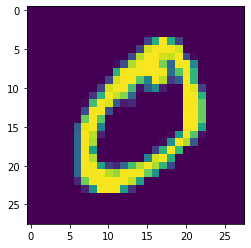

In [86]:
plt.imshow(single_image)

In [87]:
y_train.shape

(60000,)

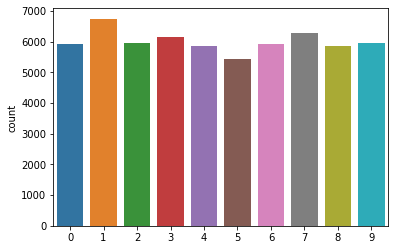

In [88]:
sns.countplot(y_train)

In [89]:
from tensorflow.keras.utils import to_categorical

In [90]:
y_cat_train = to_categorical(y_train)

In [91]:
y_train.shape

(60000,)

In [92]:
y_train[0]

5

In [93]:
y_cat_test = to_categorical(y_test)

In [94]:
y_cat_train.shape,y_cat_test.shape

((60000, 10), (10000, 10))

In [95]:
x_train[0].min(),x_train[0].max()

(0, 255)

Scale

In [96]:
x_train = x_train/255
x_test = x_test/255

In [97]:
x_train[0].min(), x_train.max()

(0.0, 1.0)

Channels

In [98]:
x_train = x_train.reshape(60000,28,28,1)

In [99]:
x_test = x_test.reshape(10000,28,28,1)

Model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [107]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

Fit

In [110]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.1514 - acc: 0.9547 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 2/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0315 - acc: 0.9901 - val_loss: 0.0370 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0331 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0164 - acc: 0.9945 - val_loss: 0.0358 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0102 - acc: 0.9965 - val_loss: 0.0484 - val_acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0090 - acc: 0.9970 

Evaluate

In [111]:
metrics = pd.DataFrame(model.history.history)

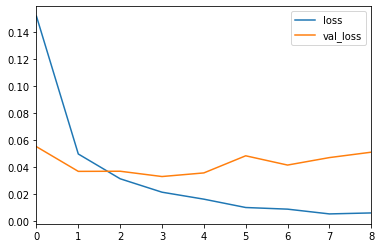

In [112]:
metrics[['loss','val_loss']].plot()

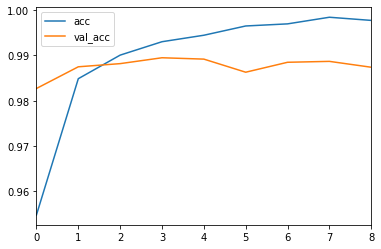

In [115]:
metrics[['acc','val_acc']].plot()

In [117]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.05107869532059223, 0.9874]

Predict and validate

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
predict = model.predict_classes(x_test)

In [121]:
y_cat_test.shape

(10000, 10)

In [122]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [128]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [129]:
confusion_matrix(y_test,predict)

array([[ 975,    1,    0,    0,    0,    2,    1,    0,    0,    1],
       [   0, 1130,    1,    2,    1,    0,    1,    0,    0,    0],
       [   2,    1, 1022,    2,    1,    0,    1,    3,    0,    0],
       [   0,    0,    0, 1006,    0,    3,    0,    0,    1,    0],
       [   0,    0,    1,    0,  971,    0,    3,    0,    0,    7],
       [   1,    0,    1,    5,    0,  883,    1,    0,    1,    0],
       [   4,    2,    0,    1,    5,    4,  942,    0,    0,    0],
       [   0,    0,    8,    0,    0,    0,    0, 1013,    1,    6],
       [   3,    1,    2,    4,    2,    7,    1,    4,  944,    6],
       [   0,    1,    0,    2,    9,    7,    0,    1,    1,  988]],
      dtype=int64)

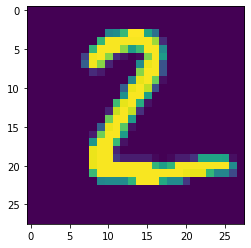

In [141]:
test_number = x_test[1].reshape(28,28)
plt.imshow(test_number)

In [143]:
model.predict_classes(test_number.reshape(1,28,28,1))

array([2], dtype=int64)